In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
data = pd.read_csv('dataset.csv')

# Drop duplicates if any
data.drop_duplicates(inplace=True)

data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Impetigo,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,Impetigo,skin_rash,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,Impetigo,skin_rash,high_fever,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,Impetigo,skin_rash,high_fever,blister,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Encode categorical data (symptoms)
symptoms = data.iloc[:, 1:].values
encoder = OneHotEncoder()
symptoms_encoded = encoder.fit_transform(symptoms).toarray()

# Encode target variable (disease)
disease = data.iloc[:, 0].values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(disease)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(symptoms_encoded, encoded_labels, test_size=0.4, random_state=42)

In [70]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(symptoms_encoded.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(encoded_labels)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 3: Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
6/6 [==============================] - 2s 71ms/step - loss: 3.7201 - accuracy: 0.0440 - val_loss: 3.6690 - val_accuracy: 0.0574
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 3.6258 - accuracy: 0.0714 - val_loss: 3.6100 - val_accuracy: 0.0984
Epoch 3/100
6/6 [==============================] - 0s 19ms/step - loss: 3.5397 - accuracy: 0.1374 - val_loss: 3.5513 - val_accuracy: 0.1557
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 3.4168 - accuracy: 0.2088 - val_loss: 3.4804 - val_accuracy: 0.2951
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 3.3446 - accuracy: 0.2692 - val_loss: 3.3925 - val_accuracy: 0.4426
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 3.2332 - accuracy: 0.3352 - val_loss: 3.2920 - val_accuracy: 0.4918
Epoch 7/100
6/6 [==============================] - 0s 16ms/step - loss: 3.1273 - accuracy: 0.3571 - val_loss: 3.1727 - val_accuracy: 0.5246
Epoch 8/100
6/6 [===

In [71]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

4/4 [==============================] - 0s 3ms/step


In [72]:
# Calculate F1 score and other metrics
f1 = f1_score(y_test, y_pred, average='weighted')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         1
    

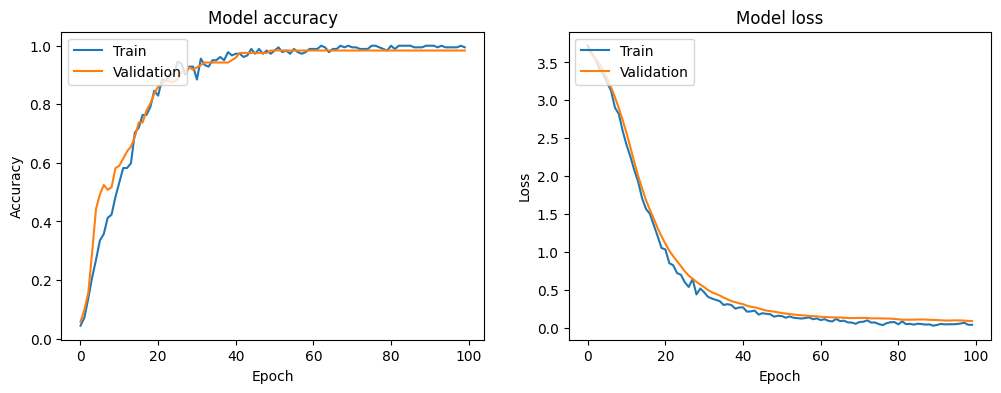

In [73]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

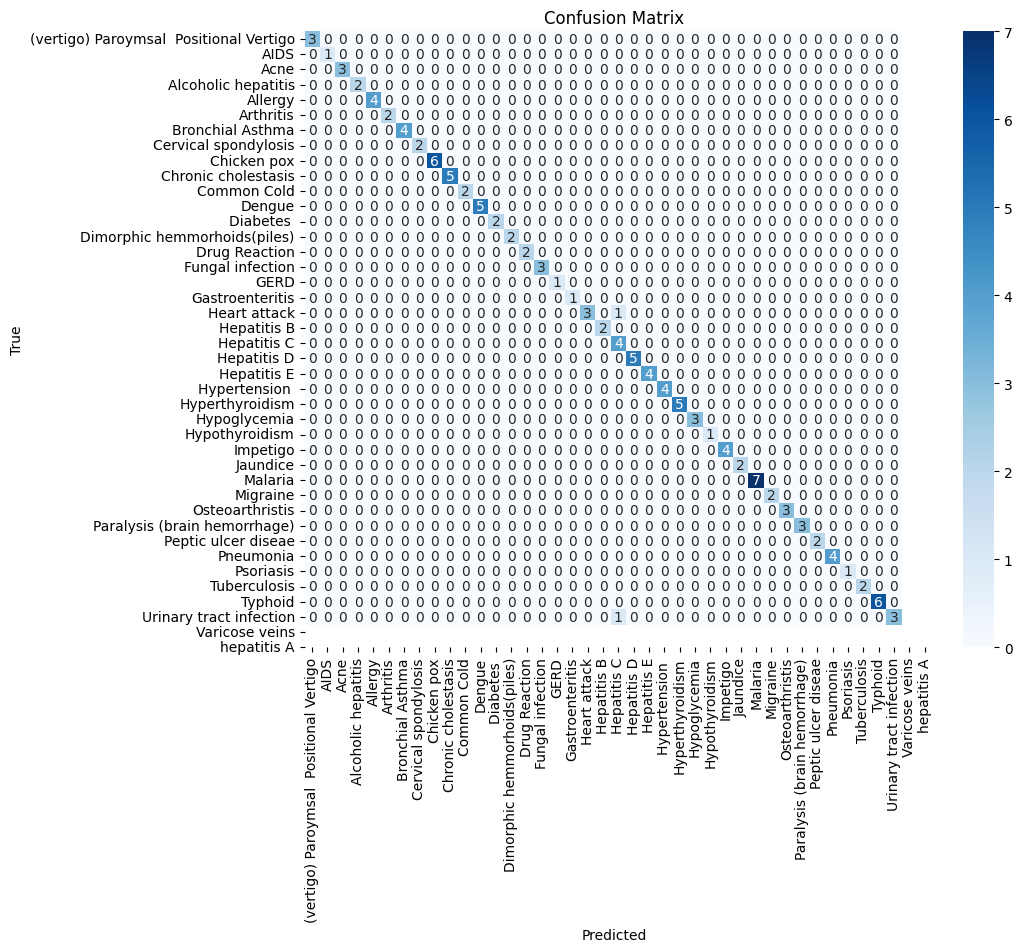

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()